In [1]:
%config Completer.use_jedi = False


# Build Dataset

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
chars = list(set(''.join(words)))
chars = sorted(chars)
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [80]:
import torch
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs) # lower case tensor, infers the array dtype while Tensor just outputs 
ys = torch.tensor(ys)

In [81]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [82]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [83]:
import torch.nn.functional as F

x_enc = F.one_hot(xs, num_classes=27).float() # cast to float to be able to feed it to the NN
x_enc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [84]:
x_enc.shape

torch.Size([228146, 27])

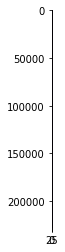

In [85]:
import matplotlib.pyplot as plt

plt.imshow(x_enc)

In [86]:
x_enc.dtype

torch.float32

In [87]:
x_enc.shape

torch.Size([228146, 27])

# Training The Network

In [100]:
W1 = torch.randn((27, 27), requires_grad=True)


In [94]:
ys.shape[0]

228146

In [95]:
# forward pass
O1 = x_enc @ W1 # --> (5, 27) for everyone of the 27 neurons we created what's the firing of the neuron
N = O1.exp()
p = N / N.sum(1, keepdim=True) # if we don't keep dims it fails
# These two lines are called Softmax
loss = -p[torch.arange(ys.shape[0]), ys].log().mean()

In [96]:
print(loss.item())

3.7085835933685303


In [76]:
# backward pass
W1.grad = None # setting the gradient to zero
loss.backward()

In [77]:
W1.data += -50*W1.grad

In [101]:
## Training Epochs
for _ in range(1000):
    O1 = x_enc @ W1 # --> (5, 27) for everyone of the 27 neurons we created what's the firing of the neuron
    N = O1.exp()
    p = N / N.sum(1, keepdim=True) # if we don't keep dims it fails
    # These last two lines are called Softmax
    loss = -p[torch.arange(ys.shape[0]), ys].log().mean()
    # backward pass
    W1.grad = None # setting the gradient to zero
    loss.backward()
    W1.data += -50*W1.grad
    print(loss)

tensor(3.8526, grad_fn=<NegBackward>)
tensor(3.4028, grad_fn=<NegBackward>)
tensor(3.1544, grad_fn=<NegBackward>)
tensor(3.0004, grad_fn=<NegBackward>)
tensor(2.9022, grad_fn=<NegBackward>)
tensor(2.8329, grad_fn=<NegBackward>)
tensor(2.7821, grad_fn=<NegBackward>)
tensor(2.7435, grad_fn=<NegBackward>)
tensor(2.7132, grad_fn=<NegBackward>)
tensor(2.6886, grad_fn=<NegBackward>)
tensor(2.6681, grad_fn=<NegBackward>)
tensor(2.6507, grad_fn=<NegBackward>)
tensor(2.6358, grad_fn=<NegBackward>)
tensor(2.6229, grad_fn=<NegBackward>)
tensor(2.6116, grad_fn=<NegBackward>)
tensor(2.6017, grad_fn=<NegBackward>)
tensor(2.5929, grad_fn=<NegBackward>)
tensor(2.5850, grad_fn=<NegBackward>)
tensor(2.5780, grad_fn=<NegBackward>)
tensor(2.5716, grad_fn=<NegBackward>)
tensor(2.5658, grad_fn=<NegBackward>)
tensor(2.5605, grad_fn=<NegBackward>)
tensor(2.5556, grad_fn=<NegBackward>)
tensor(2.5512, grad_fn=<NegBackward>)
tensor(2.5471, grad_fn=<NegBackward>)
tensor(2.5433, grad_fn=<NegBackward>)
tensor(2.539

tensor(2.4616, grad_fn=<NegBackward>)
tensor(2.4616, grad_fn=<NegBackward>)
tensor(2.4616, grad_fn=<NegBackward>)
tensor(2.4615, grad_fn=<NegBackward>)
tensor(2.4615, grad_fn=<NegBackward>)
tensor(2.4614, grad_fn=<NegBackward>)
tensor(2.4614, grad_fn=<NegBackward>)
tensor(2.4614, grad_fn=<NegBackward>)
tensor(2.4613, grad_fn=<NegBackward>)
tensor(2.4613, grad_fn=<NegBackward>)
tensor(2.4613, grad_fn=<NegBackward>)
tensor(2.4612, grad_fn=<NegBackward>)
tensor(2.4612, grad_fn=<NegBackward>)
tensor(2.4611, grad_fn=<NegBackward>)
tensor(2.4611, grad_fn=<NegBackward>)
tensor(2.4611, grad_fn=<NegBackward>)
tensor(2.4610, grad_fn=<NegBackward>)
tensor(2.4610, grad_fn=<NegBackward>)
tensor(2.4610, grad_fn=<NegBackward>)
tensor(2.4609, grad_fn=<NegBackward>)
tensor(2.4609, grad_fn=<NegBackward>)
tensor(2.4609, grad_fn=<NegBackward>)
tensor(2.4608, grad_fn=<NegBackward>)
tensor(2.4608, grad_fn=<NegBackward>)
tensor(2.4608, grad_fn=<NegBackward>)
tensor(2.4607, grad_fn=<NegBackward>)
tensor(2.460

tensor(2.4574, grad_fn=<NegBackward>)
tensor(2.4574, grad_fn=<NegBackward>)
tensor(2.4574, grad_fn=<NegBackward>)
tensor(2.4574, grad_fn=<NegBackward>)
tensor(2.4574, grad_fn=<NegBackward>)
tensor(2.4574, grad_fn=<NegBackward>)
tensor(2.4574, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4573, grad_fn=<NegBackward>)
tensor(2.4572, grad_fn=<NegBackward>)
tensor(2.4572, grad_fn=<NegBackward>)
tensor(2.4572, grad_fn=<NegBackward>)
tensor(2.4572, grad_fn=<NegBackward>)
tensor(2.4572, grad_fn=<NegBackward>)
tensor(2.4572, grad_fn=<NegBackward>)
tensor(2.4572, grad_fn=<NegBackward>)
tensor(2.457

tensor(2.4562, grad_fn=<NegBackward>)
tensor(2.4562, grad_fn=<NegBackward>)
tensor(2.4562, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.4561, grad_fn=<NegBackward>)
tensor(2.456

tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4556, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.4555, grad_fn=<NegBackward>)
tensor(2.455

KeyboardInterrupt: 

In [ ]:
O1 = x_enc @ W1 # --> (5, 27) for everyone of the 27 neurons we created what's the firing of the neuron
N = O1.exp()
p = N / N.sum(1, keepdim=True) # if we don't keep dims it fails
# These two lines are called Softmax
loss = -p[torch.arange(5), ys].log().mean()
print(loss)

In [102]:
nlls = torch.zeros(5)

for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('---------------')
    print(f'Bigram Example {i+1}: {itos[x]}{itos[y]}')
    print(f'NN input: {x}')
    print(f'Output Probabilities from the neural net {p[i]}')
    print(f'label actual next character: {y}')
    p_y = p[i, y]
    print(f'NN probability assigned to the true label: {p_y}')
    logp = torch.log(p_y)
    nll = - logp
    print("log likelihood:", logp)
    print("negative log likelihood:", nll)
    
    nlls[i] = nll
    
print('================')
print('Average negative log likelihood:', nlls.sum()/nlls.shape[0])

---------------
Bigram Example 1: .e
NN input: 0
Output Probabilities from the neural net tensor([0.0001, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0641, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290],
       grad_fn=<SelectBackward>)
label actual next character: 5
NN probability assigned to the true label: 0.04778894782066345
log likelihood: tensor(-3.0410, grad_fn=<LogBackward>)
negative log likelihood: tensor(3.0410, grad_fn=<NegBackward>)
---------------
Bigram Example 2: em
NN input: 5
Output Probabilities from the neural net tensor([0.1950, 0.0332, 0.0059, 0.0075, 0.0188, 0.0622, 0.0040, 0.0061, 0.0074,
        0.0401, 0.0027, 0.0087, 0.1590, 0.0377, 0.1310, 0.0132, 0.0041, 0.0007,
        0.0959, 0.0422, 0.0284, 0.0034, 0.0227, 0.0024, 0.0065, 0.0524, 0.0089],
       grad_fn=<SelectBackward>)
label actual next character: 13
NN probability assigned to t

In [104]:
W1

tensor([[-5.2316e+00,  1.6292e+00,  4.1217e-01,  5.7830e-01,  6.6996e-01,
          5.7114e-01, -7.2976e-01, -2.5690e-01,  1.0459e-02, -3.8090e-01,
          1.0299e+00,  1.2315e+00,  5.9757e-01,  1.0766e+00,  2.8146e-01,
         -7.8652e-01, -5.1860e-01, -2.2427e+00,  6.3931e-01,  8.6553e-01,
          4.1370e-01, -2.4081e+00, -8.3330e-01, -1.0362e+00, -1.8659e+00,
         -4.8048e-01,  7.1499e-02],
        [ 2.3842e+00, -9.5930e-02, -1.2328e-01, -2.6397e-01,  5.3220e-01,
          1.2289e-01, -1.5189e+00, -1.2927e+00,  1.3378e+00,  9.9183e-01,
         -1.2519e+00, -7.4577e-02,  1.4185e+00,  9.8209e-01,  2.1845e+00,
         -2.2736e+00, -2.0100e+00, -2.3223e+00,  1.6740e+00,  6.0260e-01,
          1.1564e-01, -4.7390e-01,  3.0953e-01, -1.3353e+00, -1.2127e+00,
          1.2089e+00, -3.4135e-01],
        [ 1.9219e+00,  2.9693e+00,  7.7697e-01, -2.1937e+00,  1.3444e+00,
          3.6857e+00, -1.8221e+00, -2.5652e+00,  8.5846e-01,  2.5746e+00,
         -1.8511e+00, -1.8021e+00,  1.81